<a href="https://colab.research.google.com/github/dfirm/iads_day5/blob/main/Practical_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install lime
!pip install shap

     |████████████████████████████████| 275 kB 8.4 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=5044f7f2929f15d9b7a469b85afb1458cc1a370526eb95c2e9c91932c5b8c530
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 356 kB 8.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491649 sha256=a145140fb6928cffbcfb19cdcfad4fc8a008a1683e77050fd111ac8e4777506d
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [3]:
import numpy as np
import pandas as pd
import shap
from shap.datasets import adult
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from IPython.display import Image  
import pydotplus

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt

import lime 
import lime.lime_tabular

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).


# Data

We have 12 features and we need to predict if the income of a person will be more than 50K or less than 50K

Attributes:

Outcome: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education-num: categorical (Numeric representation of educational qualification ranging from 1-16: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool).

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [4]:
data, labels = adult(display=True)
labels = np.array([int(label) for label in labels])
data.shape, labels.shape

((32561, 12), (32561,))

In [5]:
Counter(labels)

Counter({0: 24720, 1: 7841})

In [6]:
data.head()

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [7]:
column_names = list(data.columns)
column_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

## **Practical 3**

In [8]:
# TODO: convert categorical values to numeric values

In [9]:
cat_cols = data.select_dtypes(['category']).columns
names = list(cat_cols)
categorical_features = [data.columns.get_loc(c) for c in names]
names_index_mapping = dict(zip(names, categorical_features))

categorical_names = {}

for cn in names:
  categorical_names[names_index_mapping[cn]] = list(data[cn].cat.categories)

data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes )
data.head()



,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,1,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,0,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,1,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,0,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5


In [10]:
# TODO: split the dataset into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.3,random_state=42)

In [12]:
# TODO: implement a DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

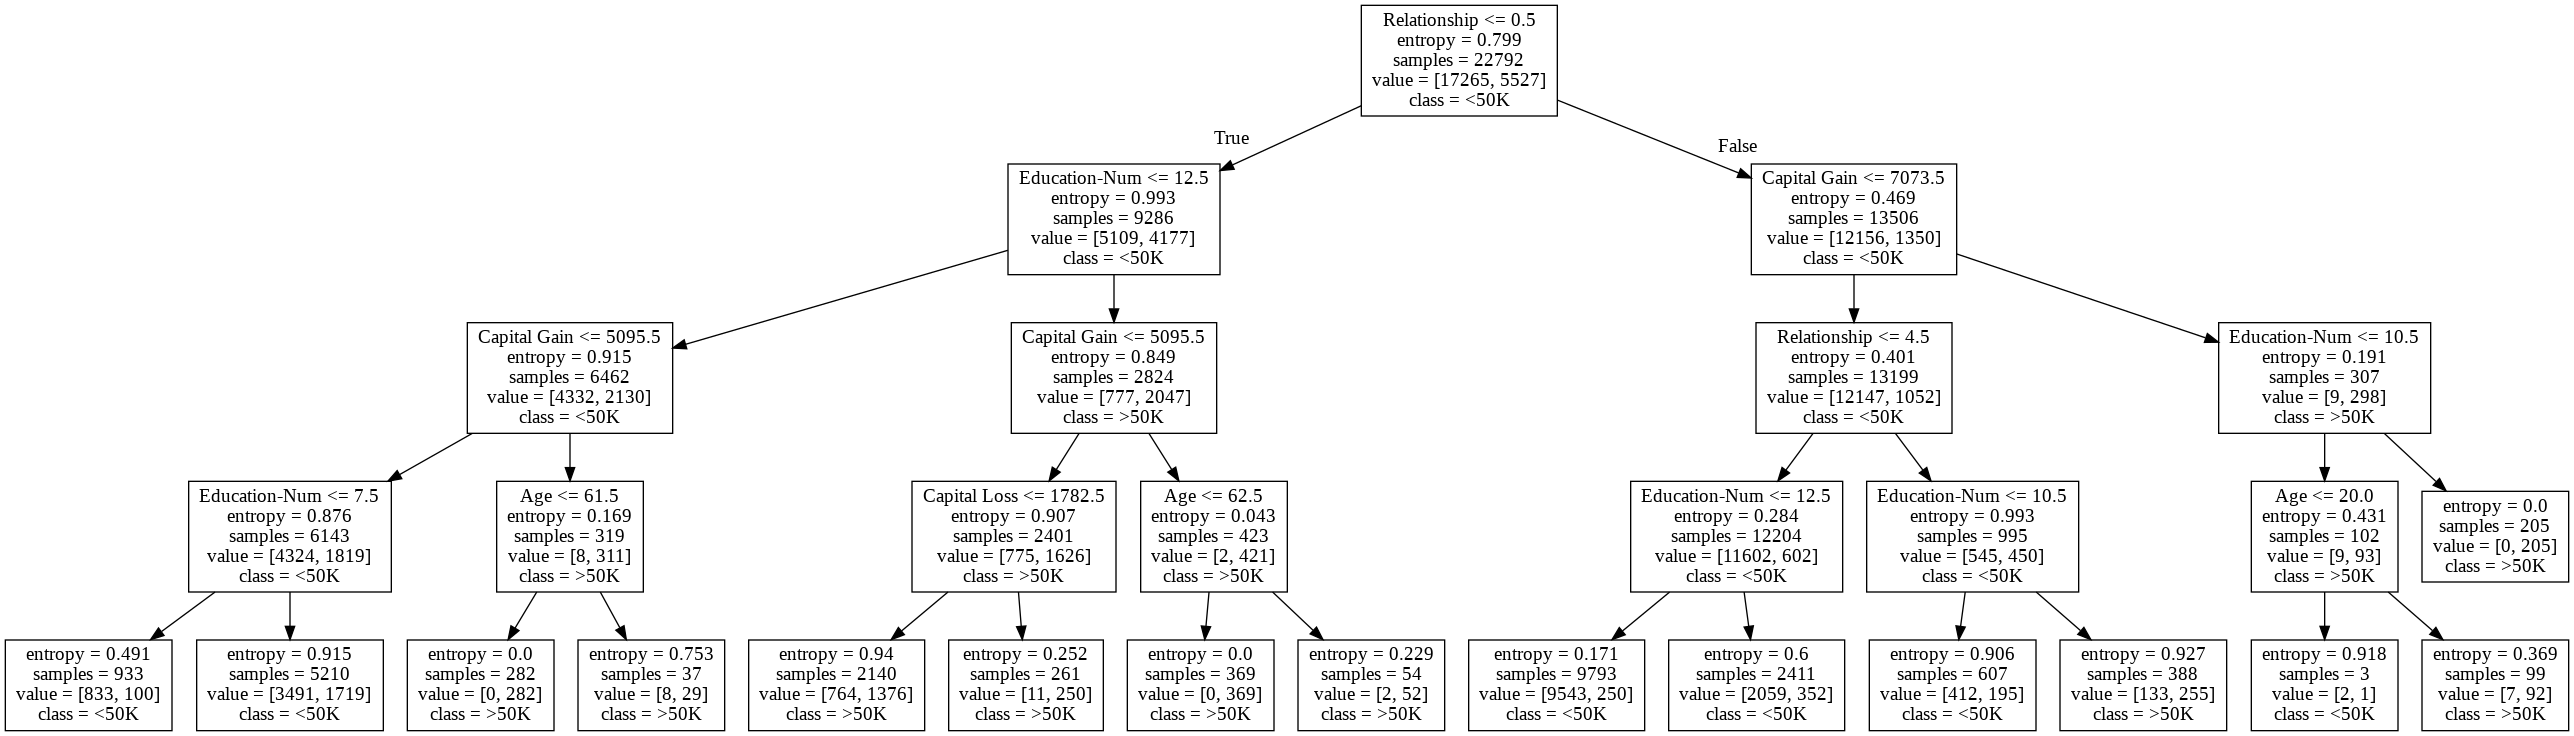

In [29]:
# dt is the tree to visualise - replace with the variable name of the decision tree classifier
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                feature_names = column_names, 
                class_names=['<50K', '>50K'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('income.png')
Image(graph.create_png())

In [30]:
# TODO: implement a RandomForestClassifier

model = RandomForestClassifier(n_estimators=40,criterion='entropy')

model.fit(X_train,y_train)

model.feature_importances_


array([0.22253073, 0.0519247 , 0.12546569, 0.07770326, 0.08724364,
       0.12338273, 0.01978937, 0.0124778 , 0.10877237, 0.03695241,
       0.11139354, 0.02236375])

In [16]:
# TODO: compute accuracy and confusion matrix for the testing set

In [31]:
pred_labels = model.predict(X_test)
print(accuracy_score(y_test,pred_labels))

print(confusion_matrix(y_test,pred_labels))



0.8505476507319071
[[6862  593]
 [ 867 1447]]


## **Practical 4**

In [18]:
# TODO: sort features by importance (see feature_importances_ in RandomForestClassifier)

In [32]:
feature_results = pd.DataFrame({'feature':list(column_names),
                                'importance':model.feature_importances_})

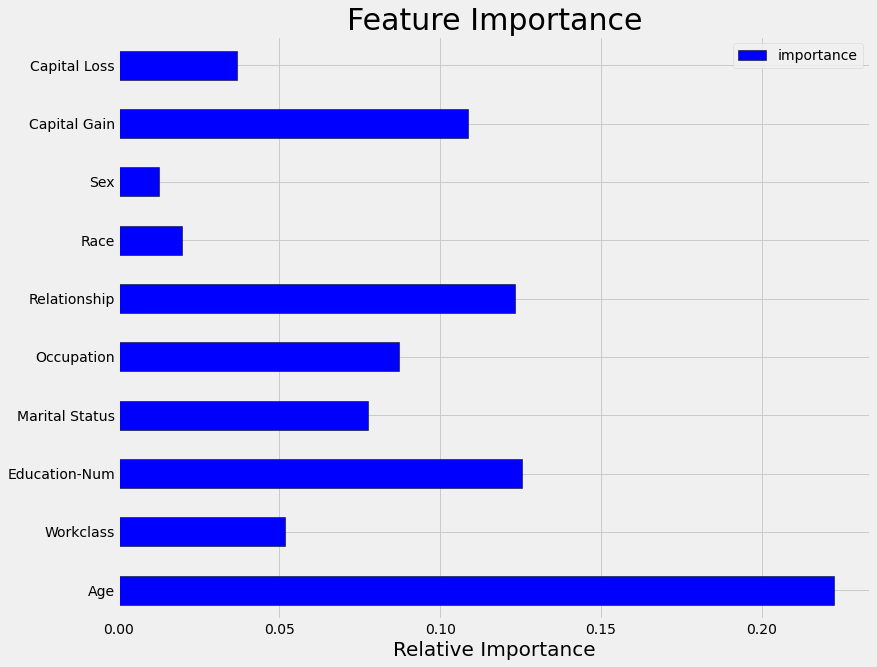

In [33]:
# plot feature_results
figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importance', size = 30);

In [21]:
# TODO: plot partial dependence for several, individual features

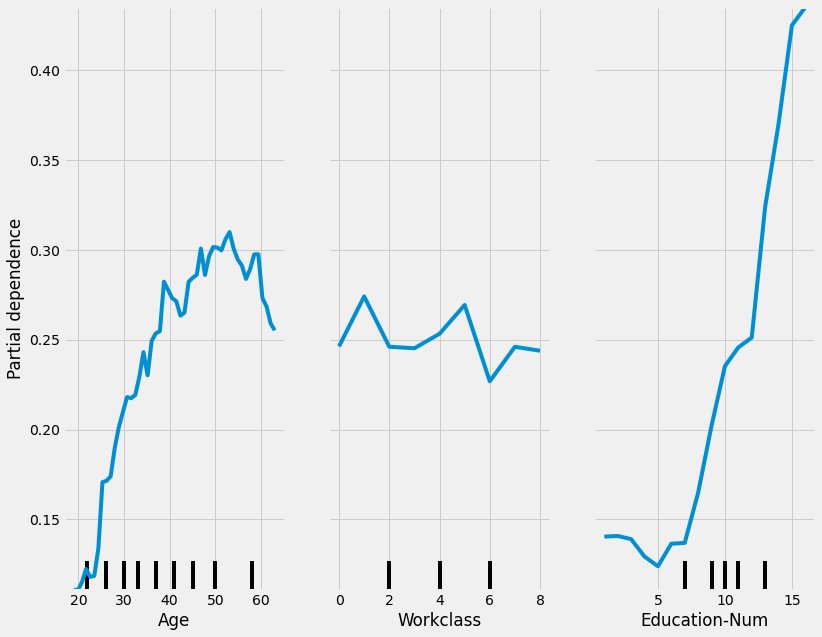

In [22]:
plot_partial_dependence(model,X_train,features=[0,1,2], feature_names=column_names,grid_resolution=50)

In [23]:
# TODO: plot partial dependence for combinations of 2 features

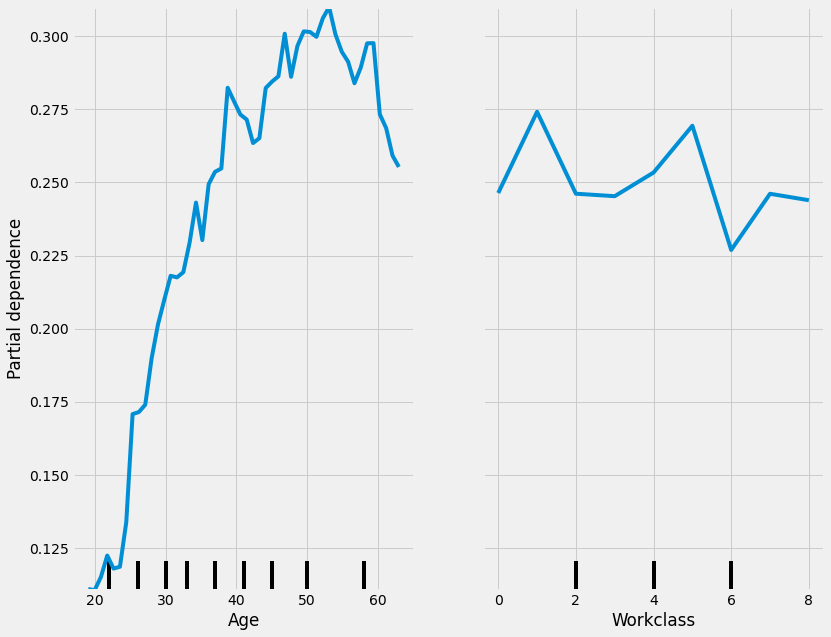

In [24]:
plot_partial_dependence(model,X_train,features=[0,1], feature_names=column_names,grid_resolution=50)

## **Practical 5**

In [25]:
# TODO: use LimeTabularExplainer

In [35]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values[:,:],feature_names=column_names,class_names=['<50k','>=50k'],categorical_features=categorical_features,categorical_names=categorical_names)
print(explainer)
exp = explainer.explain_instance(X_test.iloc[56], model.predict_proba, num_features=15)
exp.show_in_notebook(show_all=False)